<a href="https://colab.research.google.com/github/Surya-Deepak/ECG-Signal-Classification/blob/main/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
# import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 2000)

In [2]:
 df = pd.read_csv('/content/eeg_signals2.csv', index_col=0)
 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096,Label
S. No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-2,-8,-27,-43,-39,-30,-30,-27,-35,-57,-36,-19,6,20,61,63,56,25,-8,-36,-59,-74,-59,-47,-7,-4,-8,-4,28,70,84,69,18,-26,-57,-60,-53,-58,-43,-54,...,-1,1,16,53,71,78,63,47,20,7,-2,-15,-17,-11,0,7,0,-15,-33,-60,-71,-71,-54,-35,-18,-5,25,55,77,61,39,23,42,45,57,43,21,17,-16,0
2,31,25,17,7,4,4,4,6,-2,7,14,26,31,38,43,35,30,28,40,44,64,72,72,64,60,55,59,73,81,85,76,73,63,46,43,44,52,64,75,80,...,24,28,16,8,0,1,3,-1,-1,-7,-14,-18,-10,-2,2,9,1,-10,-22,-15,-5,11,24,22,12,7,7,2,-7,-6,-7,-8,-2,8,10,18,23,28,65,0
3,-56,-50,-64,-91,-135,-140,-134,-114,-115,-126,-138,-143,-126,-91,-57,-62,-91,-125,-153,-154,-147,-136,-143,-147,-153,-171,-187,-175,-141,-96,-47,-40,-55,-74,-79,-89,-94,-107,-124,-134,...,-134,-138,-136,-144,-141,-146,-141,-117,-67,-20,5,17,-5,-31,-75,-119,-160,-201,-214,-220,-206,-187,-162,-139,-118,-77,-49,-37,-43,-63,-82,-114,-138,-159,-172,-180,-173,-162,-82,0
4,-45,-62,-76,-98,-108,-106,-83,-65,-48,-41,-41,-31,-28,-34,-38,-35,-37,-38,-47,-41,-32,-11,15,20,6,-34,-53,-70,-71,-53,-40,-48,-69,-91,-110,-100,-66,-28,-1,7,...,-30,-10,2,11,-5,-21,-35,-54,-54,-32,-4,24,42,35,6,-21,-32,-32,-12,29,58,78,66,46,21,-5,-10,-18,-23,-19,-8,10,20,26,25,9,-24,-56,49,0
5,37,50,58,58,58,45,29,25,17,-2,-29,-52,-68,-59,-25,3,23,15,13,-5,-15,-25,-32,-46,-50,-44,-35,-14,1,16,6,-5,-18,-34,-43,-51,-52,-60,-60,-60,...,9,15,18,18,21,8,-14,-29,-34,-39,-44,-38,-35,-33,-28,-9,11,14,12,2,-6,-9,-5,-12,-14,-1,4,-1,-6,-9,-12,-21,-28,-41,-49,-55,-54,-56,-41,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


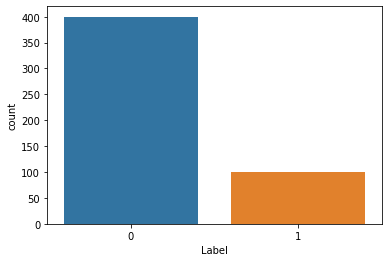

In [3]:
sns.countplot(df['Label'], order = df['Label'].value_counts().index)

In [4]:

df1=df[df.columns[-1]]
y=df1.values
df2 = df.iloc[: , :-1]
x=df2.values

In [5]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Number transactions X_train dataset:  (350, 4097)
Number transactions y_train dataset:  (350,)
Number transactions X_test dataset:  (150, 4097)
Number transactions y_test dataset:  (150,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 68
Before OverSampling, counts of label '0': 282 

After OverSampling, the shape of train_X: (564, 4097)
After OverSampling, the shape of train_y: (564,) 

After OverSampling, counts of label '1': 282
After OverSampling, counts of label '0': 282


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [7]:
df.shape

(500, 4098)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [9]:
X = df.drop('Label',axis = 1)

In [10]:
y = df['Label']

In [11]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
S. No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-2,-8,-27,-43,-39,-30,-30,-27,-35,-57,-36,-19,6,20,61,63,56,25,-8,-36,-59,-74,-59,-47,-7,-4,-8,-4,28,70,84,69,18,-26,-57,-60,-53,-58,-43,-54,...,12,-1,1,16,53,71,78,63,47,20,7,-2,-15,-17,-11,0,7,0,-15,-33,-60,-71,-71,-54,-35,-18,-5,25,55,77,61,39,23,42,45,57,43,21,17,-16
2,31,25,17,7,4,4,4,6,-2,7,14,26,31,38,43,35,30,28,40,44,64,72,72,64,60,55,59,73,81,85,76,73,63,46,43,44,52,64,75,80,...,25,24,28,16,8,0,1,3,-1,-1,-7,-14,-18,-10,-2,2,9,1,-10,-22,-15,-5,11,24,22,12,7,7,2,-7,-6,-7,-8,-2,8,10,18,23,28,65
3,-56,-50,-64,-91,-135,-140,-134,-114,-115,-126,-138,-143,-126,-91,-57,-62,-91,-125,-153,-154,-147,-136,-143,-147,-153,-171,-187,-175,-141,-96,-47,-40,-55,-74,-79,-89,-94,-107,-124,-134,...,-146,-134,-138,-136,-144,-141,-146,-141,-117,-67,-20,5,17,-5,-31,-75,-119,-160,-201,-214,-220,-206,-187,-162,-139,-118,-77,-49,-37,-43,-63,-82,-114,-138,-159,-172,-180,-173,-162,-82
4,-45,-62,-76,-98,-108,-106,-83,-65,-48,-41,-41,-31,-28,-34,-38,-35,-37,-38,-47,-41,-32,-11,15,20,6,-34,-53,-70,-71,-53,-40,-48,-69,-91,-110,-100,-66,-28,-1,7,...,-36,-30,-10,2,11,-5,-21,-35,-54,-54,-32,-4,24,42,35,6,-21,-32,-32,-12,29,58,78,66,46,21,-5,-10,-18,-23,-19,-8,10,20,26,25,9,-24,-56,49
5,37,50,58,58,58,45,29,25,17,-2,-29,-52,-68,-59,-25,3,23,15,13,-5,-15,-25,-32,-46,-50,-44,-35,-14,1,16,6,-5,-18,-34,-43,-51,-52,-60,-60,-60,...,8,9,15,18,18,21,8,-14,-29,-34,-39,-44,-38,-35,-33,-28,-9,11,14,12,2,-6,-9,-5,-12,-14,-1,4,-1,-6,-9,-12,-21,-28,-41,-49,-55,-54,-56,-41
6,-40,-13,43,69,55,12,7,28,39,19,-13,-28,-35,-18,2,24,36,25,23,20,49,60,42,14,-3,9,21,22,11,10,23,43,80,96,89,84,74,92,118,97,...,19,7,13,23,27,23,37,60,72,86,94,94,98,58,21,-8,13,26,35,21,-17,-26,-38,-29,-53,-74,-89,-71,-45,-15,36,67,79,77,40,9,-10,-21,-26,28
7,69,69,65,59,43,23,11,19,22,21,23,32,48,62,67,57,42,38,47,68,84,97,85,59,41,41,17,-6,-15,-1,25,50,68,59,36,14,8,16,34,59,...,-18,-30,-34,-38,-37,-36,-32,-33,-27,-24,2,28,53,68,44,12,-19,-20,-17,-5,-1,7,5,10,27,30,42,38,28,29,18,29,19,7,-13,-21,-29,-17,-1,-3
8,-48,-52,-63,-55,-41,-31,-20,0,6,6,-7,-35,-64,-80,-90,-93,-87,-65,-52,-28,-3,7,2,-17,-35,-37,-44,-31,-28,-17,-1,19,17,31,34,43,44,33,23,19,...,8,13,13,6,-2,-4,-12,-20,-43,-60,-63,-55,-55,-46,-26,3,20,45,63,81,66,54,38,34,35,29,13,-3,-4,1,-11,-8,-17,-17,-8,-5,1,-5,-9,0
9,113,129,108,60,3,-21,-29,-9,6,8,-3,-9,-6,2,20,37,35,6,-38,-52,-48,-19,12,28,29,29,36,33,36,35,39,35,42,50,52,40,22,3,-8,1,...,-116,-124,-96,-31,17,45,36,12,-8,-26,-33,-53,-58,-54,-47,-45,-41,-33,-29,-29,-31,-27,-18,8,41,48,39,5,-31,-61,-49,-4,32,43,19,-18,-45,-41,-22,-5


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

KeyError: ignored

In [ ]:
epochs = 20
batch_size = 10
time_steps = 4069
features = 4097

In [ ]:
model = Sequential()
model.add(LSTM(100,dropout = 0.2, input_shape = (time_steps,features)))
model.add(Dense(1,activation='relu'))
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy','mae'])
print(model.summary)
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)